<center>
<h1><b>Simulación crecimiento de bacterias para la creacion de cadenas de Markov</b> </h1>
<img src='https://drive.google.com/uc?id=1BRJ1g0pKjbt4e0bxFckLVKuRp4kBePZW' />
</center>

**Integrantes:**

- Eduard Alfonso Caballero Ponguta - 2151099
- Deisy Katherine Rangel Flórez - 2142669
- Andres Javier Cuadros Sanabria - 2151144

**Presentación**
  - [Diapositivas](https://drive.google.com/file/d/1Q_aDQFSz7h4RlXq90d9vzwjx77LIzSlw/view?usp=sharing)


###IMPORTS:

In [0]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config
!sudo pip install pygraphviz
import pygraphviz as pgv
from graphviz import Digraph as di
from IPython.display import Image
%matplotlib inline

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
python3-dev is already the newest version (3.6.7-1~18.04).
The following additional packages will be installed:
  libgvc6-plugins-gtk libxdot4
The following NEW packages will be installed:
  libgraphviz-dev libgvc6-plugins-gtk libxdot4
0 upgraded, 3 newly installed, 0 to remove and 25 not upgraded.
Need to get 91.3 kB of archives.
After this operation, 425 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libxdot4 amd64 2.40.1-2 [15.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgvc6-plugins-gtk amd64 2.40.1-2 [18.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgraphviz-dev amd64 2.40.1-2 [57.3 kB]
Fetched 91.3 kB in 2s (51.0 kB/s)
debconf: unable to initialize frontend: Dialog
debconf:

# Simulación crecimiento de bacterias:

<img src='https://drive.google.com/uc?id=1-mEYfs1E3y-Y1-Y4SH_kQNlz52XsqAoz' />
<img src='https://drive.google.com/uc?id=1ObaTQyayQSI1jzPS-ZD2EnhoGdoe_ZDM' />


In [0]:
dic = {'0' : -1, '1' : 0, '2': 1 }

def crearMicroorganismos(tam_mat,cant_ini,vi):
  A = np.zeros((tam_mat,tam_mat))
  for _ in range(cant_ini):
    i = np.random.choice(range(tam_mat))
    j = np.random.choice(range(tam_mat))
    # print("pos",i,j)
    A[i][j]=vi*1.
  return A

def vecinos(m):
  v = np.where(m == 0)
  return v

def simulationCrecimientoMicroorganismos(tam_mat, cant_ini,CA, CV, DV, DVSA,t):
  MO=[]
  CU = dict()
  vivas = []
  M = crearMicroorganismos(tam_mat,cant_ini,CV)
  # MO.append(np.copy(M))
  for _ in range(tam_mat*tam_mat*t):
    i = np.random.choice(range(tam_mat))
    j = np.random.choice(range(tam_mat))
    if M[i][j] > 0:
      # print("Hay un microorganismo!")
      pos= str(i)+str(j)
      if  pos in CU:
        CU[str(i)+str(j)] += ""
      else:
        CU[str(i)+str(j)] = ""
      if CA > 0:
        if np.random.random()>.5:
          #Se va a alimentar
          CA-=1
          CU[str(i)+str(j)] += ',a'
          if M[i][j] > 0:
            M[i][j] = M[i][j] - DV
            #Se quito vida          
            if M[i][j] == 0:
              CU[str(i)+str(j)] += ',m'
              #Murio
        else:
          #no se alimento
          CU[str(i)+str(j)]  += ',na'
          if M[i][j] > 0:
            M[i][j] = M[i][j] - DVSA
            #Se quito vida          
            if M[i][j] == 0:
              CU[str(i)+str(j)] += ',m'
              #Murio
        if np.random.random()>.5:
          #Celdas vecinas donde reproducirse
          MV = vecinos(M[i-1:i+2,j-1:j+2])
          if len(MV[0]) >= 1:
            #Posicion aleatoria del vecino, para reproducirse
            pos = np.random.randint(0,len(MV[0]))
            ni=dic.get(str(MV[0][pos]))
            nj=dic.get(str(MV[1][pos]))
            M[i+ni][j+nj] = CV
            CU[str(i)+str(j)] += ',r'
        else:
          #No se reproduce
          CU[str(i)+str(j)] += ',nr'
      else:
            #no se alimento
            CU[str(i)+str(j)]  += ',na'
            if M[i][j] > 0:
              M[i][j] = M[i][j] - DVSA
              #Se quito vida          
              if M[i][j] == 0:
                CU[str(i)+str(j)] += ',m'
                #Murio



    MO.append(np.copy(M))
    vivas.append(len(np.where(M > 0)[0])*1.)
  return CU, vivas, MO #MO,vivas,

# Estados de transición:

In [0]:
#Calcula la cantidad de veces que sucede cada transición
def ajustar_estados(C):
  for i in C:
      C[i]=C[i].split(',')
      C[i].pop(0)
      for j in range(len(C[i])-1):
        estados[str(C[i][j])+"-"+str(C[i][j+1])] += 1
        estados["cont"] += 1

In [0]:
#Calcula la probabilidad de cada transición 
def prob_estados():
  vsum = []
  suma = 0
  for num,i in enumerate(estados):
    # print(i,num,(num+1) % 5)
    if i != "cont":
      if ((num+1) % 5) != 0:
        suma += estados[i]/estados["cont"]
      else:
        suma += estados[i]/estados["cont"]
        vsum.append(suma)
        suma = 0
  cont = 0
  # print(vsum)
  for num,i in enumerate(estados):
    if i != "cont":
      if vsum[cont] > 0:
        if ((num+1) % 5) == 0:
          estados[i] = (estados[i]/estados["cont"])/vsum[cont]
          cont +=1
        else:
          estados[i] = (estados[i]/estados["cont"])/vsum[cont]

# Generación de cadena de Markov

In [0]:
# Genera el grafo con las probabilidades
def crear_cadena_markov():
  G=pgv.AGraph(label="nr= No reproducción \n r= Reproducción \n na= No Alimentación \n a= Alimentación \n m= Muerte ",
              strict=False, pack=45,splines="curved")
  G.add_node('na')
  G.add_node('m')
  G.add_node('r')
  G.add_node('nr')
  G.add_node('a')

  G.layout()

  for estado in estados:
    if estado != "cont":
      if estados[estado] > 0.0009 and  estados[estado] < 1:
        G.add_edge( estado.split("-")[0], estado.split("-")[1], label="{0:.3f}".format(estados[estado]), weight=estados[estado], dir="forward")

  G.draw('markov.png')

# Ejecución de la simulación


> Caracteristicas: <br>
* Tamaño del cultivo (N)
* Bacterias iniciales (I)
* Cantidad de alimento disponible por sitio de matriz (CA)
* Período de viabilidad para cada microorganismo (CV)
* Factor de disminución de vida para microorganismos si éste se alimenta (DV)
* Factor de disminución de vida para microorganismos si éste no se alimenta (DVSA)
* Representacion del tiempo (t)
> > $$f(t) = t*N*N$$







In [0]:
#Guarda la cantidad de veces que ocurre cada transición
estados = {"na-na":0,"na-nr":0,"na-a":0,"na-r":0,"na-m":0,
           "nr-na":0,"nr-nr":0,"nr-a":0,"nr-r":0,"nr-m":0,
           "a-na":0,"a-nr":0,"a-a":0,"a-r":0,"a-m":0,
           "r-na":0,"r-nr":0,"r-a":0,"r-r":0,"r-m":0,
           "m-na":0,"m-nr":0,"m-a":0,"m-r":0,"m-m":0,
           "cont":1}
#Cantidad de veces que se ejecuta la simulación
N,I,CA,CV,DV,DVSA,t = 20,5,100,50,1,2,40
for _ in range(100):
  print(".",end="")
  CU, vivas, snapshots = simulationCrecimientoMicroorganismos(N,I,CA,CV,DV,DVSA,t) #snapshots, vivas,
  ajustar_estados(CU)
  
X = [i/(N*N) for i in range(len(vivas))]
plt.plot(X,vivas)
plt.ylabel("Poblacion de bacterias")
plt.xlabel("Tiempo")
plt.show()

....................................................................................................

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Cadena de Markov generada
<img src='https://drive.google.com/uc?id=1B2r9RCKThsgxs-n6Td-_EI9qvOACajSj' width="400px"/>

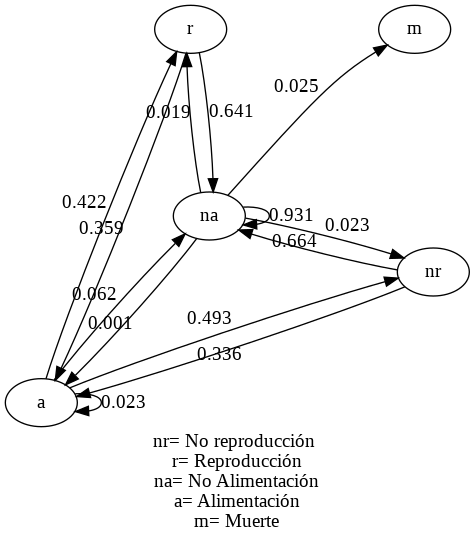

In [0]:
#Generar cadena de Markov
prob_estados()
crear_cadena_markov()
Image('markov.png')

In [0]:
columns = ["na","nr","a","r","m"]
mat=list(estados.values())[:-1]
t_mat = np.array(np.reshape(mat, (5, 5))).T
markov = pd.DataFrame(t_mat, columns=columns,index=columns)
markov.m[0] = 0.0
markov.head()

,na,nr,a,r,m
na,0.931162,0.664008,0.0625,0.641376,0.0
nr,0.023313,0.000000,0.4930,0.000000,0.0
a,0.000975,0.335992,0.0228,0.358624,0.0
r,0.019334,0.000000,0.4217,0.000000,0.0
m,0.025215,0.000000,0.0000,0.000000,0.0


# Exportar crecimiento de bacterias

In [0]:
%matplotlib notebook
fps = N*N
nSeconds = t

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(8,8) )

a = snapshots[0]
im = plt.imshow(a,cmap="hot")

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_array(snapshots[i])
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = nSeconds * fps,
                               interval = 1000 / fps, # in ms
                               )
# plt.show()
anim.save('Crecimiento_Microorganismos.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])

print('Done!')